In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q /content/drive/MyDrive/donateacry-corpus-master.zip -d ../

In [3]:
import os
import pandas as pd
import librosa

import numpy as np
from scipy.io import wavfile as wav
from sklearn.decomposition import PCA

In [6]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.2 MB/s eta 0:00:00


In [4]:
def traverse_subfolders(subfolders):
    audio_files = []
    subfolder_names = []

    for subfolder in subfolders:

        #get last sub part of path
        #for example path='/home/User/Documents/file.txt',
        #the result of this func is 'file.txt'
        subfolder_name = os.path.basename(subfolder)

        #extend func contains two list,
        #for example fruits = ['apple', 'banana', 'cherry']
        #cars = ['Ford', 'BMW', 'Volvo']
        #fruits.extend(cars)
        #['apple', 'banana', 'cherry', 'Ford', 'BMW', 'Volvo']
        audio_files.extend(get_audio_files(subfolder))

        subfolder_names.extend([subfolder_name] * len(get_audio_files(subfolder)))

    return audio_files, subfolder_names

In [5]:
#add in list file names in given folder
def get_audio_files(subfolder):
    audio_files = []

    for root, dirs, files in os.walk(subfolder):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))

    return audio_files

In [7]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    print("mfccs_scaled_features", mfccs_scaled_features)
    return mfccs_scaled_features

In [8]:
def process_audio_files(audio_files, subfolder_names, n_components):
    data = []

    #zip func is match two list, first item of first list and first item of second list ...
    #a = ("John", "Charles", "Mike")
    #b = ("Jenny", "Christy", "Monica")
    #x = zip(a, b)
    #(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'), ('Tom', 'Teddy'))
    for audio_file, subfolder_name in zip(audio_files, subfolder_names):
        compressed_data = features_extractor(audio_file)  # Extract MFCC features
        data.append([audio_file, compressed_data, subfolder_name])

    df = pd.DataFrame(data, columns=["File", "Compressed Data", "Subfolder Name"])
    return df

In [9]:
def compress_audio_pca(audio_data, n_components):
    # Reshape audio data to a 2D array
    audio_data_2d = audio_data.reshape(-1, 1)

    # Apply PCA
    pca = PCA(n_components=n_components)
    compressed_data_2d = pca.fit_transform(audio_data_2d)

    # Restore the compressed data to its original shape
    compressed_data = compressed_data_2d.reshape(-1)

    return compressed_data

In [ ]:
subfolders = ['../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/belly_pain',
              '../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/burping',
              '../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/discomfort',
              '../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/hungry',
              '../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/tired']

n_components = 1

audio_files, subfolder_names = traverse_subfolders(subfolders)
df = process_audio_files(audio_files, subfolder_names, n_components)
print(df)

In [11]:
df = df.drop("File",axis=1)
print("df", df)

df                                        Compressed Data Subfolder Name
0    [-503.241, 155.62462, -53.089638, -9.338754, 1...     belly_pain
1    [-252.29735, 145.54681, -58.926727, -16.598595...     belly_pain
2    [-395.50275, 134.50542, -40.998844, -3.8517056...     belly_pain
3    [-417.36902, 195.04312, -93.95171, -6.475128, ...     belly_pain
4    [-402.05515, 153.38997, -106.98005, -21.820833...     belly_pain
..                                                 ...            ...
452  [-342.02777, 141.73976, -60.807823, -2.4191434...          tired
453  [-436.26205, 127.123055, -39.831596, -5.720746...          tired
454  [-351.70438, 161.53825, -45.698017, 8.19686, 2...          tired
455  [-533.6597, 179.17615, -76.12666, -19.429266, ...          tired
456  [-419.99188, 105.610344, -10.740171, -10.28356...          tired

[457 rows x 2 columns]


In [12]:
data = df.to_csv("Audio_data.csv")

In [14]:
df.head()

,Compressed Data,Subfolder Name
0,"[-503.241, 155.62462, -53.089638, -9.338754, 1...",belly_pain
1,"[-252.29735, 145.54681, -58.926727, -16.598595...",belly_pain
2,"[-395.50275, 134.50542, -40.998844, -3.8517056...",belly_pain
3,"[-417.36902, 195.04312, -93.95171, -6.475128, ...",belly_pain
4,"[-402.05515, 153.38997, -106.98005, -21.820833...",belly_pain


In [15]:
for i in range(457):

    df["shape"] = len(df["Compressed Data"][i])
df.head()

,Compressed Data,Subfolder Name,shape
0,"[-503.241, 155.62462, -53.089638, -9.338754, 1...",belly_pain,40
1,"[-252.29735, 145.54681, -58.926727, -16.598595...",belly_pain,40
2,"[-395.50275, 134.50542, -40.998844, -3.8517056...",belly_pain,40
3,"[-417.36902, 195.04312, -93.95171, -6.475128, ...",belly_pain,40
4,"[-402.05515, 153.38997, -106.98005, -21.820833...",belly_pain,40


In [192]:
print("df", df)

df                                        Compressed Data Subfolder Name  shape
0    [-503.241, 155.62462, -53.089638, -9.338754, 1...     belly_pain     40
1    [-252.29735, 145.54681, -58.926727, -16.598595...     belly_pain     40
2    [-395.50275, 134.50542, -40.998844, -3.8517056...     belly_pain     40
3    [-417.36902, 195.04312, -93.95171, -6.475128, ...     belly_pain     40
4    [-402.05515, 153.38997, -106.98005, -21.820833...     belly_pain     40
..                                                 ...            ...    ...
452  [-342.02777, 141.73976, -60.807823, -2.4191434...          tired     40
453  [-436.26205, 127.123055, -39.831596, -5.720746...          tired     40
454  [-351.70438, 161.53825, -45.698017, 8.19686, 2...          tired     40
455  [-533.6597, 179.17615, -76.12666, -19.429266, ...          tired     40
456  [-419.99188, 105.610344, -10.740171, -10.28356...          tired     40

[457 rows x 3 columns]


In [16]:
len(df["Compressed Data"][0])

40

In [17]:
df.rename(columns={"Subfolder Name":"class"},inplace=True)
df.head()

,Compressed Data,class,shape
0,"[-503.241, 155.62462, -53.089638, -9.338754, 1...",belly_pain,40
1,"[-252.29735, 145.54681, -58.926727, -16.598595...",belly_pain,40
2,"[-395.50275, 134.50542, -40.998844, -3.8517056...",belly_pain,40
3,"[-417.36902, 195.04312, -93.95171, -6.475128, ...",belly_pain,40
4,"[-402.05515, 153.38997, -106.98005, -21.820833...",belly_pain,40


[]

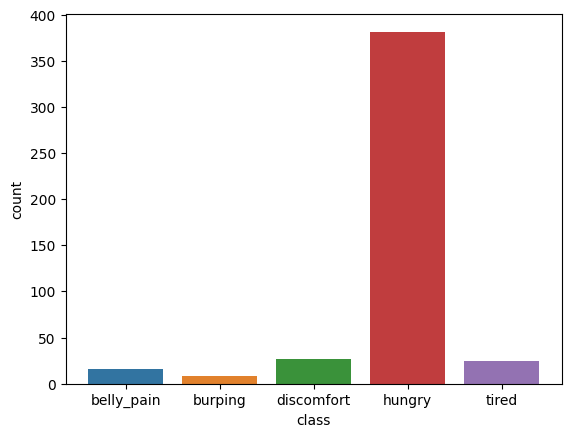

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="class",data=df)
plt.plot()

In [19]:


x = df["Compressed Data"]
y=df["class"]
x.shape



(457,)

In [197]:
print(y_train)

111     3
481     0
1104    1
272     3
185     3
       ..
1558    4
1608    4
493     0
527     0
1192    1
Name: class, Length: 1528, dtype: int64


In [20]:
#BALANCED DATASET
from imblearn.over_sampling import RandomOverSampler
# The algorithm identifies the minority class and then oversamples
#it to balance the class distribution. The oversampling is done by
#randomly duplicating instances of the minority class until it has
#the same number of samples as the majority class.
resamp = RandomOverSampler()
x = x.to_numpy()
print("y",y)
#z = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]])
#z.reshape(-1,1)
#array([[ 1],[ 2],[ 3],[ 4],[ 5],[ 6],[ 7],[ 8],[ 9],[10],[11],[12]])
x=x.reshape(-1,1)
x,y=resamp.fit_resample(x,y)


y 0      belly_pain
1      belly_pain
2      belly_pain
3      belly_pain
4      belly_pain
          ...    
452         tired
453         tired
454         tired
455         tired
456         tired
Name: class, Length: 457, dtype: object


[]

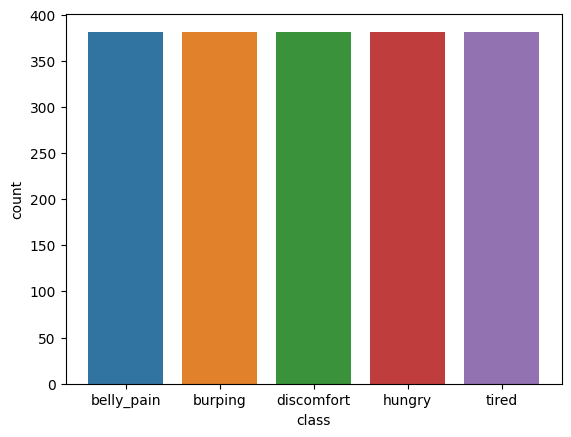

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y,data=df)
plt.plot()

In [22]:
x.shape

(1910, 1)

In [23]:
data = {'Data': x, 'class': y}

In [24]:
len(x[0][0])

40

In [25]:
df = pd.DataFrame(x,columns=["Data"])
df["class"]=y
df["class"].value_counts()

belly_pain    382
burping       382
discomfort    382
hungry        382
tired         382
Name: class, dtype: int64

In [26]:
df.head()

,Data,class
0,"[-503.241, 155.62462, -53.089638, -9.338754, 1...",belly_pain
1,"[-252.29735, 145.54681, -58.926727, -16.598595...",belly_pain
2,"[-395.50275, 134.50542, -40.998844, -3.8517056...",belly_pain
3,"[-417.36902, 195.04312, -93.95171, -6.475128, ...",belly_pain
4,"[-402.05515, 153.38997, -106.98005, -21.820833...",belly_pain


In [27]:
df_new = df["Data"].apply(pd.Series)
df_result = pd.concat([df, df_new], axis=1)
df_result = df_result.drop('Data', axis=1)
df_result.head()

,class,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,belly_pain,-503.240997,155.624619,-53.089638,-9.338754,18.954021,-30.361128,-10.490328,-0.191979,-25.778471,...,0.319255,-1.159282,-5.115259,-1.217770,0.125908,-1.005656,0.573103,1.187626,3.673102,5.454000
1,belly_pain,-252.297348,145.546814,-58.926727,-16.598595,3.672817,-41.373680,-9.418192,4.132543,-18.737617,...,0.550760,-5.418118,-6.275674,1.943464,4.089917,3.125057,5.577553,5.847311,3.363588,-0.538266
2,belly_pain,-395.502747,134.505417,-40.998844,-3.851706,10.750525,-36.928837,-15.562065,-5.356579,-29.510025,...,0.759146,0.411946,-1.037288,2.146250,0.676931,-0.602084,1.970804,0.503776,-0.253919,1.737532
3,belly_pain,-417.369019,195.043121,-93.951714,-6.475128,26.089195,-48.660007,-2.435213,9.719328,-35.364525,...,3.994046,-1.651921,-2.227159,2.260709,-1.822480,-1.984720,1.249259,-2.182734,-3.065945,-1.158216
4,belly_pain,-402.055145,153.389969,-106.980049,-21.820833,25.608887,-38.460133,1.304661,20.323946,-27.275322,...,-1.519563,-0.294574,-0.964433,2.116224,0.412925,-0.575139,2.065878,-1.443322,-3.860727,-0.361463


In [28]:
print("df_result['class']",df_result['class'])

df_result['class'] 0       belly_pain
1       belly_pain
2       belly_pain
3       belly_pain
4       belly_pain
           ...    
1905         tired
1906         tired
1907         tired
1908         tired
1909         tired
Name: class, Length: 1910, dtype: object


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(['belly_pain', 'burping', 'discomfort', 'hungry', 'tired'])  # Replace with your actual classes

# Save label encoder classes to a file
np.save('label_encoder_classes.npy', label_encoder.classes_)

df_result['class'] = label_encoder.fit_transform(df_result['class'])

df_result.head()
print("label_encoder.classes_",label_encoder.classes_)

label_encoder.classes_ ['belly_pain' 'burping' 'discomfort' 'hungry' 'tired']


In [31]:
x = df_result.drop("class",axis=1)
y=df_result["class"]
df_result.head()


,class,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,0,-503.240997,155.624619,-53.089638,-9.338754,18.954021,-30.361128,-10.490328,-0.191979,-25.778471,...,0.319255,-1.159282,-5.115259,-1.217770,0.125908,-1.005656,0.573103,1.187626,3.673102,5.454000
1,0,-252.297348,145.546814,-58.926727,-16.598595,3.672817,-41.373680,-9.418192,4.132543,-18.737617,...,0.550760,-5.418118,-6.275674,1.943464,4.089917,3.125057,5.577553,5.847311,3.363588,-0.538266
2,0,-395.502747,134.505417,-40.998844,-3.851706,10.750525,-36.928837,-15.562065,-5.356579,-29.510025,...,0.759146,0.411946,-1.037288,2.146250,0.676931,-0.602084,1.970804,0.503776,-0.253919,1.737532
3,0,-417.369019,195.043121,-93.951714,-6.475128,26.089195,-48.660007,-2.435213,9.719328,-35.364525,...,3.994046,-1.651921,-2.227159,2.260709,-1.822480,-1.984720,1.249259,-2.182734,-3.065945,-1.158216
4,0,-402.055145,153.389969,-106.980049,-21.820833,25.608887,-38.460133,1.304661,20.323946,-27.275322,...,-1.519563,-0.294574,-0.964433,2.116224,0.412925,-0.575139,2.065878,-1.443322,-3.860727,-0.361463


In [32]:
#CLASSIFICATION WITH DECISIONTREE
#split 5x382 data, 1x382 data = test, 4x382 data = train
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import f1_score,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
DT= DecisionTreeClassifier()
X_test
print(y_train)

111     3
481     0
1104    1
272     3
185     3
       ..
1558    4
1608    4
493     0
527     0
1192    1
Name: class, Length: 1528, dtype: int64


In [33]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
pred=DT.predict(X_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred, average='weighted'))

0.9607329842931938
0.9595484914380702


In [ ]:
tired="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/tired/C5127741-5897-468C-A543-7F1B72569F0E-1428333964-1.0-m-26-ti.wav"
belly="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/belly_pain/ae5f103b-5fee-442f-bb1b-d9d0570c46ab-1431533857965-1.7-m-26-bp.wav"
discomfort="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/discomfort/7b0e160e-0505-459e-8ecb-304d7afae9d2-1437486974312-1.7-m-04-dc.wav"
hungry="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/hungry/0a983cd2-0078-4698-a048-99ac01eb167a-1433917038889-1.7-f-04-hu.wav"


# new_audio_features = features_extractor(belly)
# new_audio_features = features_extractor(tired)
# new_audio_features = features_extractor(discomfort)
new_audio_features = features_extractor(hungry)

new_audio_features_2d = new_audio_features.reshape(1, -1)
# new_audio_features.shape
new_pre =pd.DataFrame(new_audio_features_2d)
pred=DT.predict(new_pre)[0]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.classes_ = np.load('label_encoder_classes.npy')  # Load your saved label encoder classes
predicted_class = label_encoder.classes_[pred]
print("predicted_class", predicted_class)


In [35]:
#CLASSIFICATION WITH RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [36]:
pred = RF.predict(X_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred, average='weighted'))

1.0
1.0


In [ ]:
tired="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/tired/C5127741-5897-468C-A543-7F1B72569F0E-1428333964-1.0-m-26-ti.wav"
belly="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/belly_pain/ae5f103b-5fee-442f-bb1b-d9d0570c46ab-1431533857965-1.7-m-26-bp.wav"
discomfort="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/discomfort/7b0e160e-0505-459e-8ecb-304d7afae9d2-1437486974312-1.7-m-04-dc.wav"
hungry="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/hungry/0a983cd2-0078-4698-a048-99ac01eb167a-1433917038889-1.7-f-04-hu.wav"


# new_audio_features = features_extractor(belly)
new_audio_features = features_extractor(tired)
# new_audio_features = features_extractor(discomfort)
# new_audio_features = features_extractor(hungry)

new_audio_features_2d = new_audio_features.reshape(1, -1)
# new_audio_features.shape
new_pre =pd.DataFrame(new_audio_features_2d)

predicted_label_index = RF.predict(new_pre)[0]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.classes_ = np.load('label_encoder_classes.npy')  # Load your saved label encoder classes
predicted_class = label_encoder.classes_[predicted_label_index]
print("predicted_class", predicted_class)


In [39]:
#CLASSIFICATION WITH ARTIFICAL NEURAL NETWORK
import numpy as np
import pandas as pd
import tensorflow as tf

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [40]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs=300, batch_size=32)

In [ ]:
_, accuracy = ann.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
pred = ann.predict(X_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred, average='weighted'))

In [ ]:
tired="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/tired/C5127741-5897-468C-A543-7F1B72569F0E-1428333964-1.0-m-26-ti.wav"
belly="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/belly_pain/ae5f103b-5fee-442f-bb1b-d9d0570c46ab-1431533857965-1.7-m-26-bp.wav"
discomfort="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/discomfort/7b0e160e-0505-459e-8ecb-304d7afae9d2-1437486974312-1.7-m-04-dc.wav"
hungry="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/hungry/0a983cd2-0078-4698-a048-99ac01eb167a-1433917038889-1.7-f-04-hu.wav"


# new_audio_features = features_extractor(belly)
# new_audio_features = features_extractor(tired)
# new_audio_features = features_extractor(discomfort)
new_audio_features = features_extractor(hungry)

new_audio_features_2d = new_audio_features.reshape(1, -1)
# new_audio_features.shape
new_pre =pd.DataFrame(new_audio_features_2d)

predictions = ann.predict(new_pre)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.classes_ = np.load('label_encoder_classes.npy')  # Load your saved label encoder classes


predicted_label_index = np.argmax(predictions)
predicted_class = label_encoder.classes_[predicted_label_index]
print("predicted_class", predicted_class)

In [44]:
#CLASSIFICATION WITH CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import IPython.display as ipd

In [ ]:
cnn = Sequential()
cnn.add(Dense(units=8, activation='relu', input_dim=40))
cnn.add(Dense(units=6, activation='relu'))
cnn.add(Dense(units=5, activation='sigmoid'))
cnn.summary()

In [46]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
print(y_train)

In [ ]:
history = cnn.fit(X_train, y_train, epochs=300, validation_data= (X_test, y_test))

In [55]:
prediction = cnn.predict(X_test)
pred = np.argmax(prediction, axis=1)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred, average='weighted'))

12/12 [==============================] - 0s 2ms/step
0.5549738219895288
0.5226819961435099


In [59]:
tired="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/tired/C5127741-5897-468C-A543-7F1B72569F0E-1428333964-1.0-m-26-ti.wav"
belly="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/belly_pain/ae5f103b-5fee-442f-bb1b-d9d0570c46ab-1431533857965-1.7-m-26-bp.wav"
discomfort="../donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/discomfort/7b0e160e-0505-459e-8ecb-304d7afae9d2-1437486974312-1.7-m-04-dc.wav"
# new_audio_features = features_extractor(belly)
new_audio_features = features_extractor(tired)
# new_audio_features = features_extractor(discomfort)

new_audio_features_2d = new_audio_features.reshape(1, -1)
# new_audio_features.shape
new_pre =pd.DataFrame(new_audio_features_2d)

predictions = cnn.predict(new_pre)
# Get the predicted class label
predicted_label_index = np.argmax(predictions)
predicted_class = label_encoder.classes_[predicted_label_index]


predicted_labels = np.argmax(predictions, axis=-1)
predicted_class_names = label_encoder.inverse_transform(predicted_labels)
print("predicted_class_names",predicted_class_names)

mfccs_scaled_features [-4.8105014e+02  1.5849435e+02 -1.7768682e+01  1.2018711e+01
  1.9702278e+01 -3.8116741e+01 -2.3107891e+01 -6.2758074e+00
 -2.7467508e+01 -1.7177439e+01 -9.6759768e+00 -2.0301037e+01
 -8.1741152e+00 -3.5789881e+00 -1.0103346e+01  1.4138474e+00
 -2.8561029e-01 -1.2208203e+01 -4.0522971e+00 -4.7460866e+00
 -1.4919191e+01 -6.8806639e+00 -3.7974620e+00 -1.0229995e+01
 -4.5296807e+00 -2.3312349e+00 -6.6327891e+00 -2.0324044e+00
 -7.7905971e-01 -4.3654542e+00 -2.3589635e+00 -3.8527961e+00
 -6.1076508e+00 -1.6578746e+00 -1.5833397e+00 -3.6800060e+00
 -1.8764667e-01  3.8804203e-01 -1.4069268e+00 -3.3238328e-01]
1/1 [==============================] - 0s 42ms/step
predicted_class_names ['belly_pain']
